In [1]:
%pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



dataset = pd.read_excel(r"C:\Users\Aditya\Downloads\HousePricePrediction.xlsx")

Note: you may need to restart the kernel to use updated packages.


## 1.Basic Exploratory Data Analysis on Our Dataset

In [2]:
dataset.head()

Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0

In [3]:
dataset.shape

(2919, 13)

In [4]:
dataset.describe()

Id   MSSubClass        LotArea  OverallCond    YearBuilt  \
count  2919.000000  2919.000000    2919.000000  2919.000000  2919.000000   
mean   1459.000000    57.137718   10168.114080     5.564577  1971.312778   
std     842.787043    42.517628    7886.996359     1.113131    30.291442   
min       0.000000    20.000000    1300.000000     1.000000  1872.000000   
25%     729.500000    20.000000    7478.000000     5.000000  1953.500000   
50%    1459.000000    50.000000    9453.000000     5.000000  1973.000000   
75%    2188.500000    70.000000   11570.000000     6.000000  2001.000000   
max    2918.000000   190.000000  215245.000000     9.000000  2010.000000   

       YearRemodAdd   BsmtFinSF2  TotalBsmtSF      SalePrice  
count   2919.000000  2918.000000  2918.000000    1460.000000  
mean    1984.264474    49.582248  1051.777587  180921.195890  
std       20.894344   169.205611   440.766258   79442.502883  
min     1950.000000     0.000000     0.000000   34900.000000  
25%     1965.000000     0.000000   793.000000  129975.000000  
50%     1993.000000     0.000000   989.500000  163000.000000  
75%     2004.000000     0.000000  1302.000000  214000.000000  
max     2010.000000  1526.000000  6110.000000  755000.000000

In [5]:
dataset.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

## 2.Data Preprocessing -  now,we categorize the features depending on their datatype(int,float,object) and then calculate the number of them

In [6]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables",len(object_cols))


int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))


fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables 4
Integer variables: 6
Float variables: 3


<Axes: >

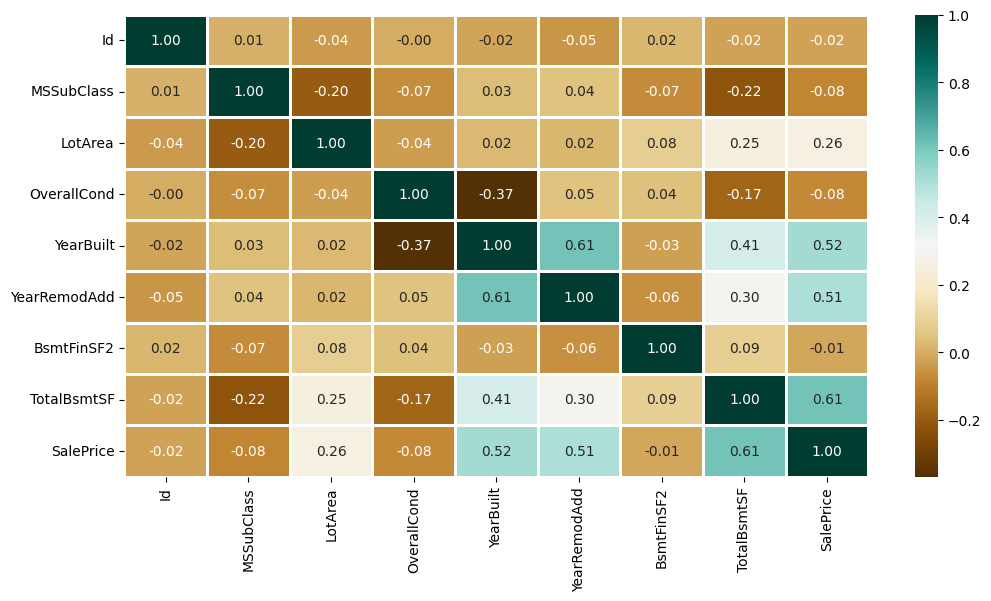

In [7]:
# 3. Advanced EDA (using visuals)

numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)


<Axes: title={'center': 'No. of Unique values of Categorical features.'}>

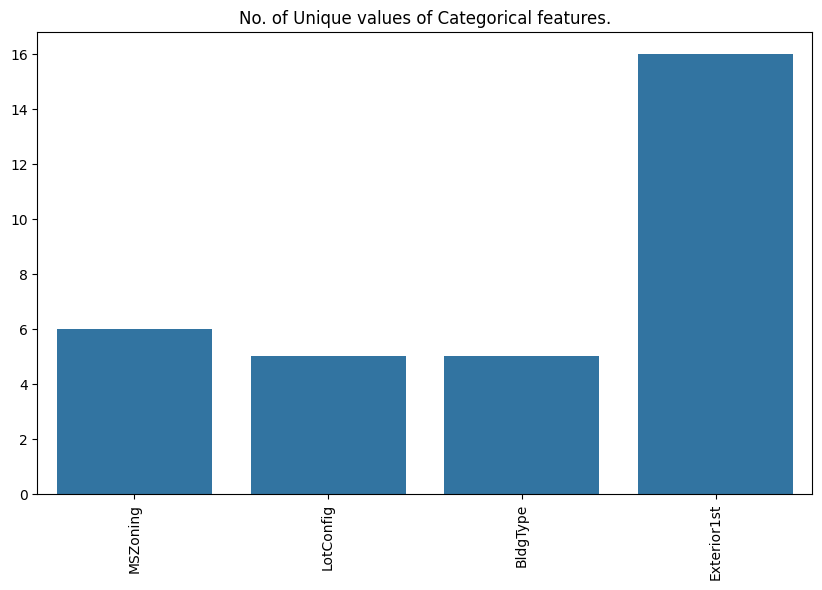

In [8]:
# analysing different categorical features

unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title("No. of Unique values of Categorical features.")
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

### the plot shows  that exterior1st has around 16 unique categories and other features have around 6 unique categories  

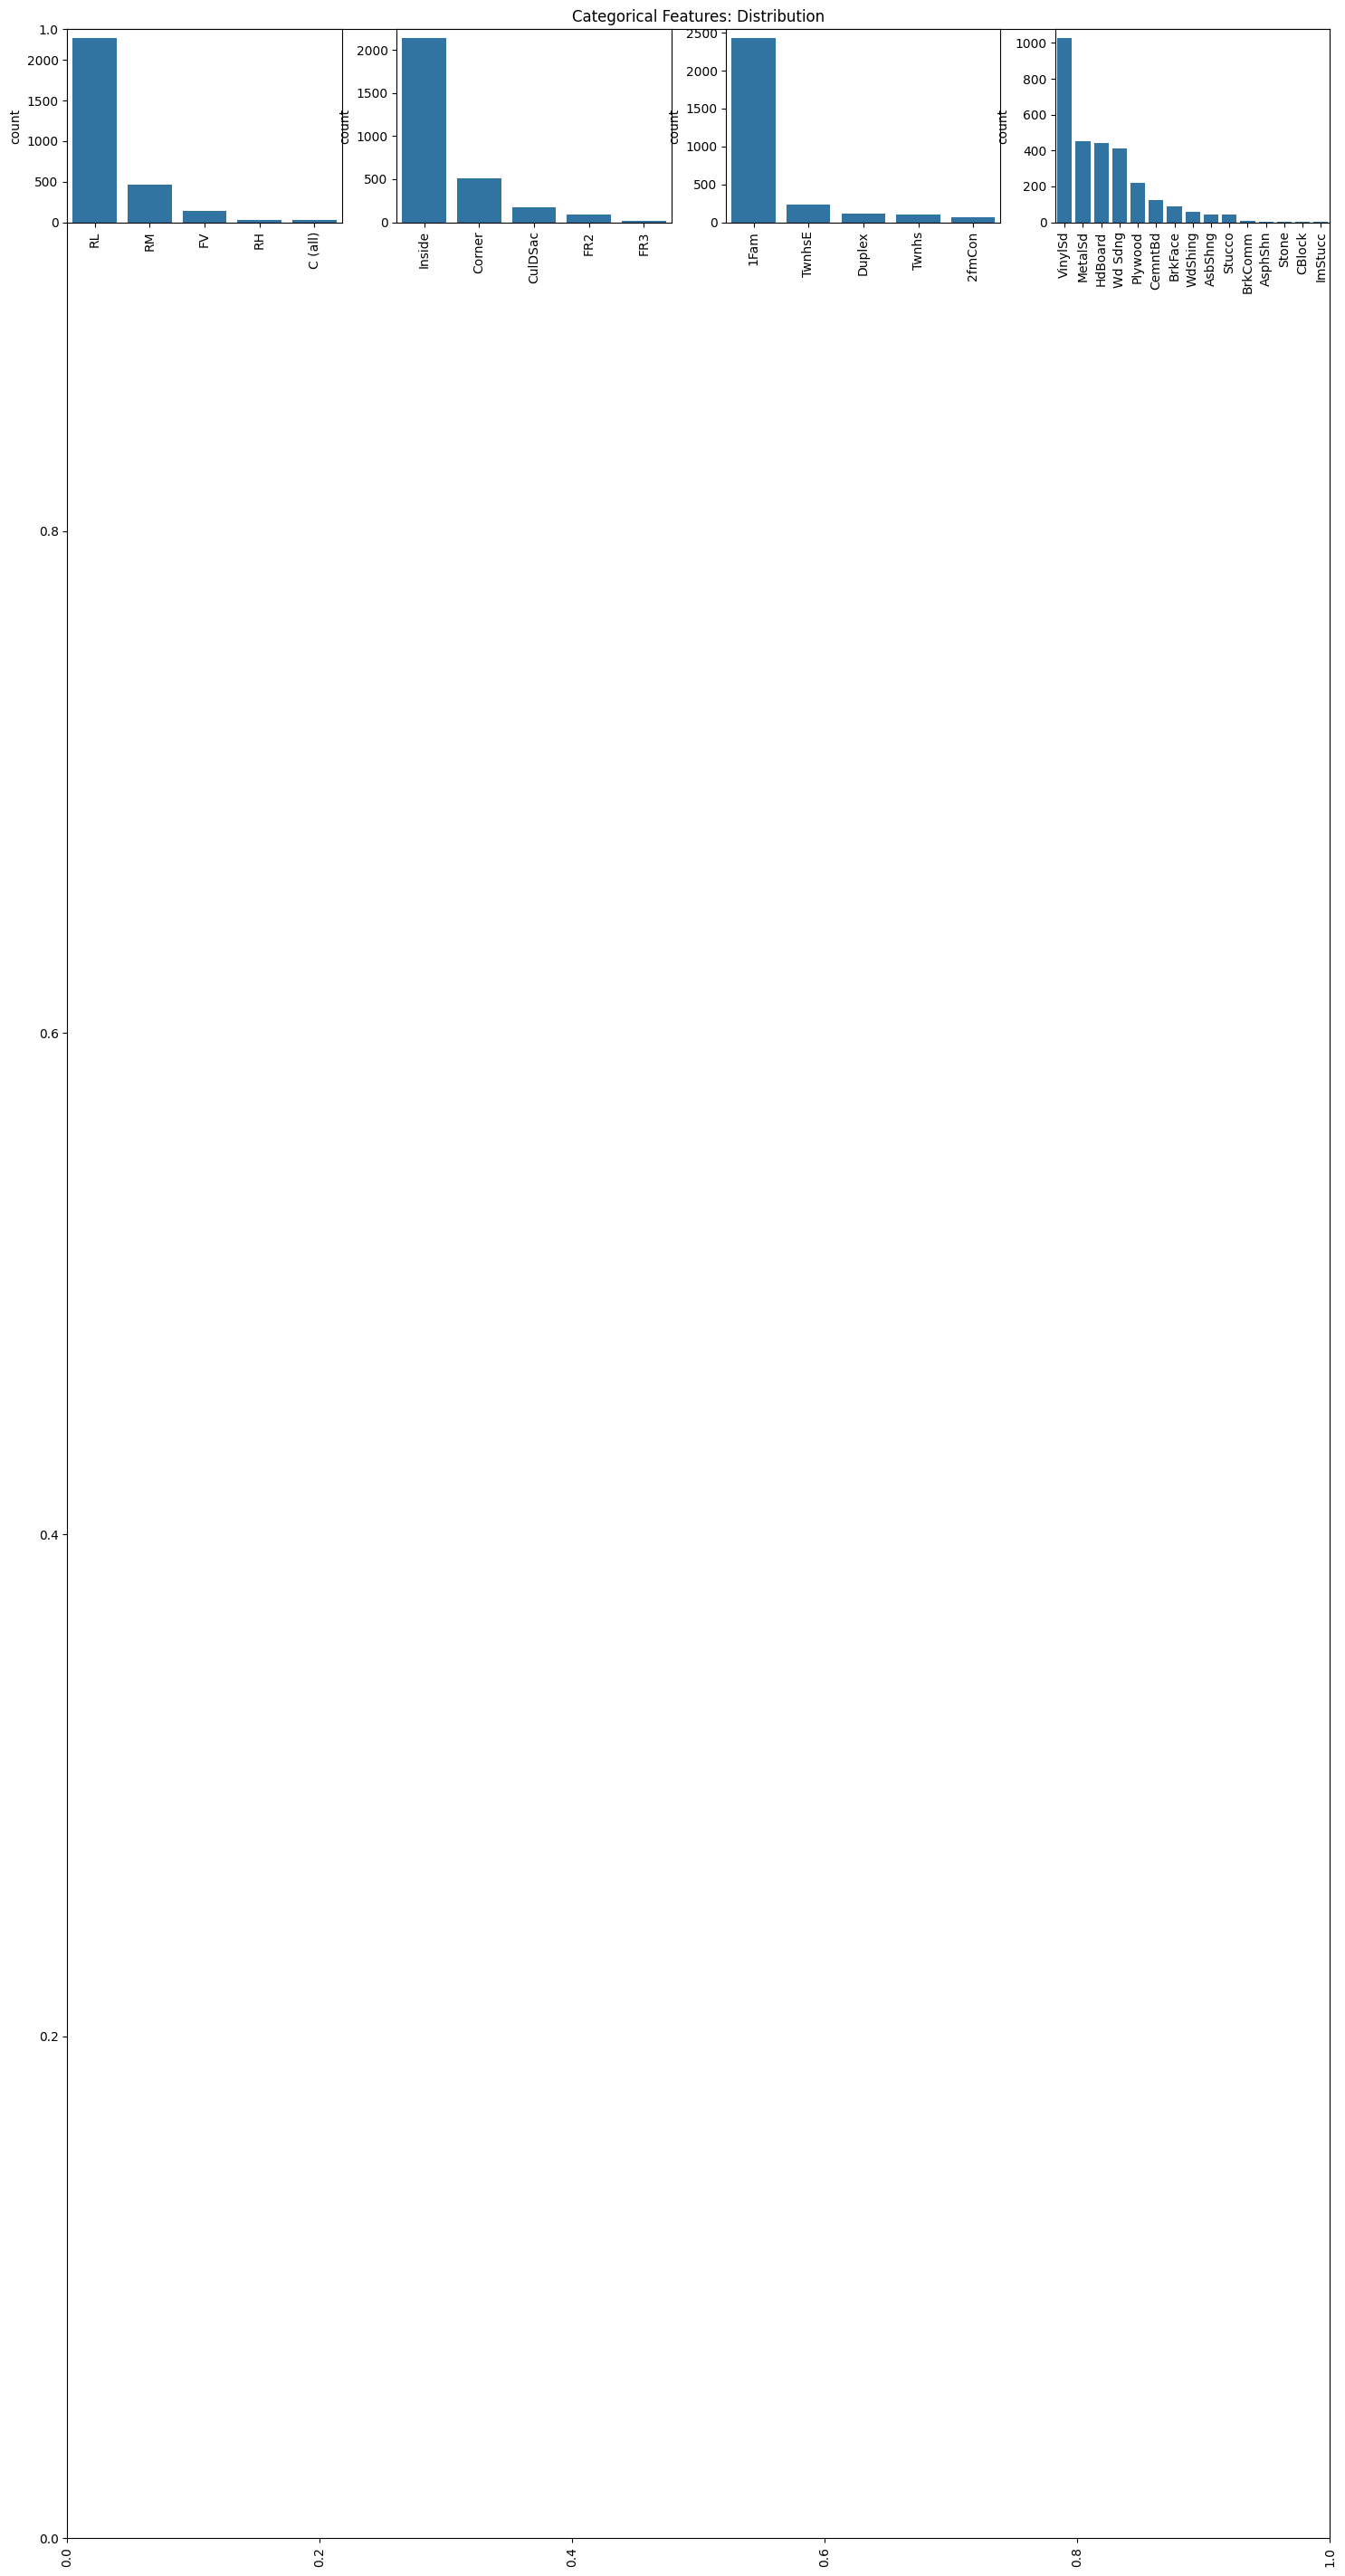

In [9]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

## 3.Data Cleaning

### there are some columns which are irrelevent for the model training.so we can drop that column before training.


In [10]:
# as ID Column will not be used in prediction so we can drop it

dataset.drop(['Id'],
             axis=1,
             inplace=True)

In [11]:
# replacing SalePrice empty values with their mean values tomake the data distribution symmetric.

dataset['SalePrice'] = dataset['SalePrice'].fillna(
    dataset['SalePrice'].mean()
)


In [12]:
# dropping records with null values 
new_dataset = dataset.dropna()

In [13]:
# checking features which have null values in the new dataframe(if there are still any).
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [14]:
# one hot encoder - for label categorical features
import sklearn
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of categorical features: ',
      len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of categorical features:  4


In [17]:
#applying onehotencoder
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols,axis=1)
df_final = pd.concat([df_final,OH_cols],axis=1)


### 4.Spliting Dataset into training and testing
#### X and Y splitting(i.e Y is the SalePrice column and the rest of the other columns are X)

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'],axis=1)
Y = df_final['SalePrice']

# splitting the training set into training and validation set
X_train,X_valid,Y_train,Y_valid = train_test_split(
    X,Y,train_size=0.8,test_size=0.2,random_state=0
)



### 5.Model and Accuracy
#### as we have to train the model to determine the continuous values, so we will be using these regression models.

##### 1. SVM-Support Vector Machine
##### 2. Random-Forest Regressor
##### 3. Linear Regressor

In [23]:
# support vector machine - SVM can be used on both regression and classification model. it finds the hyperplane in the n-dimensional plane.
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid,Y_pred))

0.1870512931870423


In [25]:
# random forest regressor
# random forest is an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks.

from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train,Y_train)
Y_pred = model_RFR.predict(X_valid)


mean_absolute_percentage_error(Y_valid,Y_pred)

0.19352925522431294

In [28]:
# linear regression 
## linear regression predicts the final output-dependent value based on the given independent features.Like,here we have to 
## predict SalePrice depending on features like MSSubClass,YearBuilt,BldgType,Exterior1st etc

from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train,Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid,Y_pred))

0.187416838415999


#### Conclusion - SVM Model is giving better accuracy as the mean absolute error is the least among all the other regressor models ie.0.18 approx. to get much better results ensemble learning  techniques like bagging and boosting can also be used.